In [1]:
import pandas as pd
import numpy as np
from  sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
Data = pd.read_csv(r"C:\Users\santh\Downloads\archive (2).zip")
Data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
Data.shape

(5572, 2)

In [4]:
Data.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
Data.duplicated().sum()

415

In [6]:
Data = Data.drop_duplicates(keep='first')

In [7]:
Data.duplicated().sum()

0

In [8]:
#Shape after dropping duplicates
Data.shape

(5157, 2)

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [10]:
Le=LabelEncoder()

In [11]:
Data['Target'] = Le.fit_transform(Data['Category'])
Data.head()

,Category,Message,Target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
Data['Target'].value_counts()

0    4516
1     641
Name: Target, dtype: int64

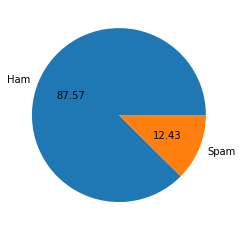

In [13]:
plt.pie(Data['Target'].value_counts(), labels = ['Ham', 'Spam'], autopct = "%0.2f")
plt.show()

In [14]:
import nltk

In [15]:
Data['Total_letters'] = Data['Message'].apply(len)
Data.head()

,Category,Message,Target,Total_letters
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [16]:
df = Data.drop(["Category"], axis = 1)
df.head()

,Message,Target,Total_letters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [17]:
from nltk import word_tokenize, sent_tokenize

In [18]:
df['Total_Words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Message,Target,Total_letters,Total_Words
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15


In [19]:
df["Total_sent"] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Message,Target,Total_letters,Total_Words,Total_sent
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [20]:
df.describe()

,Target,Total_letters,Total_Words,Total_sent
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,0.124297,79.103936,18.557882,1.950553
std,0.329952,58.382922,13.406024,1.362981
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,118.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [21]:
#Ham Messages
df[df['Target']== 0].describe()

,Target,Total_letters,Total_Words,Total_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.869353,17.264836,1.806244
std,0.0,56.708301,13.587852,1.281910
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [22]:
#spam Messages
df[df['Target']== 1].describe()

,Target,Total_letters,Total_Words,Total_sent
count,641.0,641.000000,641.000000,641.000000
mean,1.0,137.118565,27.667707,2.967239
std,0.0,30.399707,7.103501,1.480241
min,1.0,7.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,8.000000


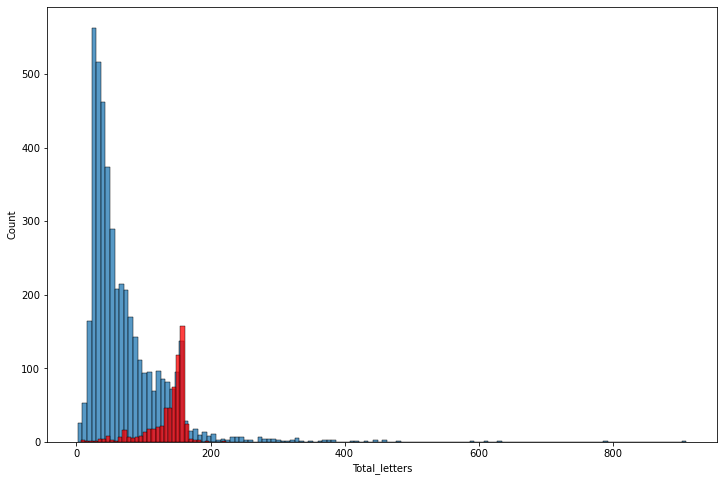

In [23]:
plt.figure(figsize = (12,8))
sns.histplot(df[df["Target"] == 0]['Total_letters'])
sns.histplot(df[df["Target"] == 1]['Total_letters'], color = "red")
plt.show()

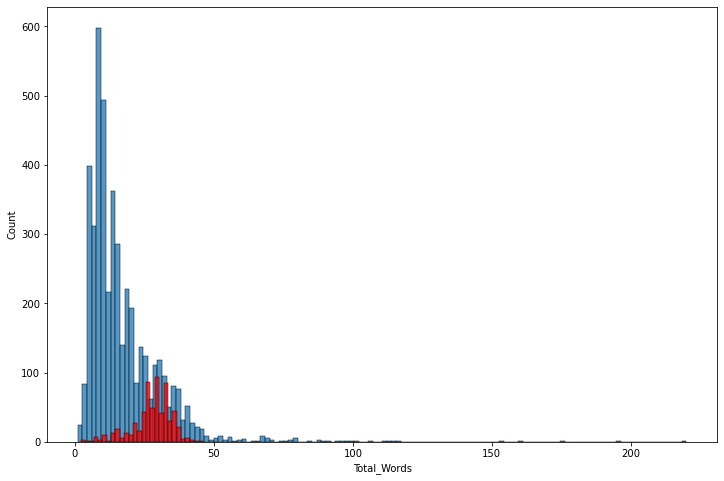

In [24]:
plt.figure(figsize = (12,8))
sns.histplot(df[df["Target"] == 0]['Total_Words'])
sns.histplot(df[df["Target"] == 1]['Total_Words'], color = "red")
plt.show()

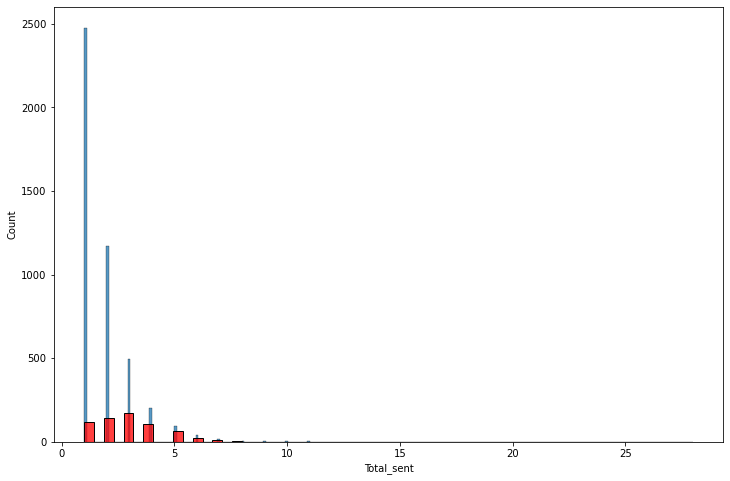

In [25]:
plt.figure(figsize = (12,8))
sns.histplot(df[df["Target"] == 0]['Total_sent'])
sns.histplot(df[df["Target"] == 1]['Total_sent'], color = "red")
plt.show()

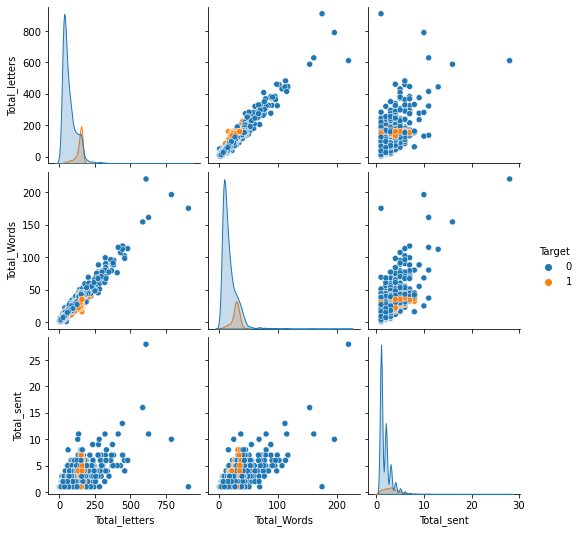

In [26]:
sns.pairplot(df, hue = 'Target')

In [27]:
df.corr()

,Target,Total_letters,Total_Words,Total_sent
Target,1.000000,0.374409,0.256038,0.281055
Total_letters,0.374409,1.000000,0.966164,0.636615
Total_Words,0.256038,0.966164,1.000000,0.683371
Total_sent,0.281055,0.636615,0.683371,1.000000


<AxesSubplot:>

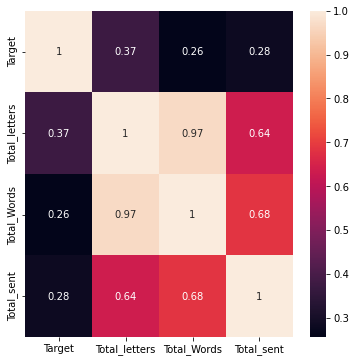

In [28]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True)

In [29]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
!pip install stopwords

In [31]:
import stopwords

In [32]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('Loving')

'love'

In [34]:
df['Message'][100]

"Please don't text me anymore. I have nothing else to say."

In [35]:
def transform_text(Message):
    #tokenizing and converting texts in lower case
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)
   
    #removing alphanumeric values
    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)
    
    #removing stopwords and puctuations
    Message = y[:]
    y.clear()
    
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    #stemming
    Message = y[:]
    y.clear()
    for i in Message:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [36]:
transform_text("Please don't text me anymore. I have nothing else to say.")

'pleas text anymor noth els say'

In [37]:
df['Transformed_text'] = df["Message"].apply(transform_text)
df.head()

,Message,Target,Total_letters,Total_Words,Total_sent,Transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud
wc = WordCloud(height=50, width=50, min_font_size=10, background_color="white")

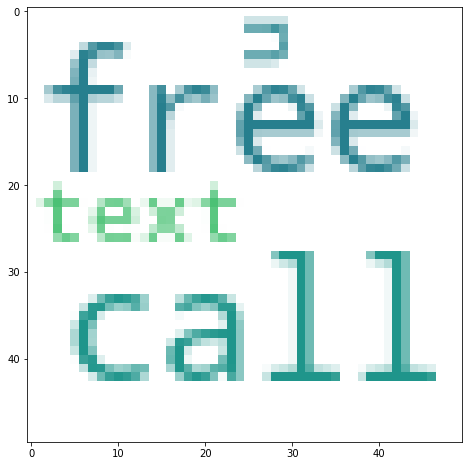

In [39]:
plt.figure(figsize = (12,8))
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

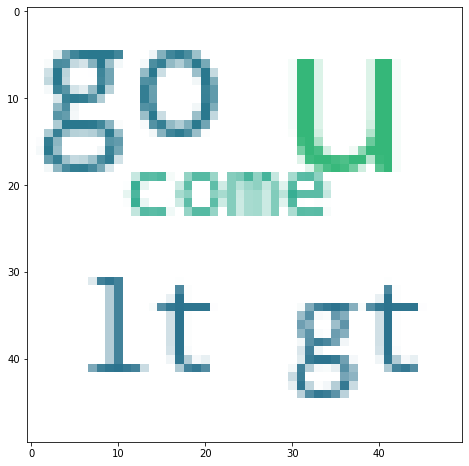

In [40]:
plt.figure(figsize = (12,8))
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [41]:
spam_corpus = []
for item in df[df['Target']==1]['Transformed_text'].tolist():
    for word in item.split():
        spam_corpus.append(word)

In [42]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [43]:
!pip install collection

C:\Users\santh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


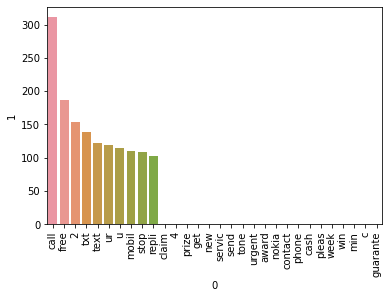

In [44]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
ham_corpus = []
for item in df[df['Target']==0]['Transformed_text'].tolist():
    for word in item.split():
        ham_corpus.append(word)

In [46]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

C:\Users\santh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


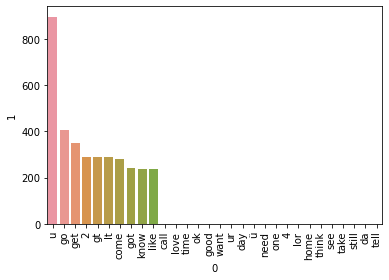

In [47]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(10))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv =  CountVectorizer()
Tfid =  TfidfVectorizer()

In [49]:
x = Tfid.fit_transform(df['Transformed_text']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.2)

In [66]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [67]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(precision_score(Y_test, y_pred))

0.8527131782945736
[[778 139]
 [ 13 102]]
0.42323651452282157


In [54]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9718992248062015
[[917   0]
 [ 29  86]]
1.0


In [55]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.9738372093023255
[[910   7]
 [ 20  95]]
0.9313725490196079


In [59]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb=MultinomialNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=50, random_state=2)

In [91]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dt,
    'RF' : rf
}

In [92]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(y_pred, Y_test)
    prec=precision_score(y_pred, Y_test)
    
    return acc, prec

In [93]:
acc_scores=[]
prec_scores=[]

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    
    print("Accuracy: ", current_accuracy)
    print("Presision: ",current_precision)
    
    acc_scores.append(current_accuracy)
    prec_scores.append(current_precision)

Accuracy:  0.9806201550387597
Presision:  0.8347826086956521
Accuracy:  0.9127906976744186
Presision:  0.21739130434782608
Accuracy:  0.9718992248062015
Presision:  0.7478260869565218
Accuracy:  0.9563953488372093
Presision:  0.8608695652173913
Accuracy:  0.9748062015503876
Presision:  0.782608695652174


In [100]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy': acc_scores, 'Precision':prec_scores}).sort_values('Accuracy', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.980620,0.834783
4,RF,0.974806,0.782609
2,NB,0.971899,0.747826
3,DT,0.956395,0.860870
1,KN,0.912791,0.217391


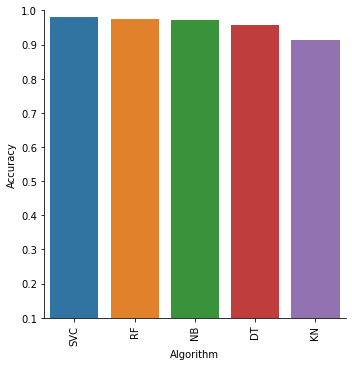

In [110]:
sns.catplot(x='Algorithm', y='Accuracy',
        data=performance_df, kind='bar')
plt.ylim(0.1, 1.0)
plt.xticks(rotation='vertical')
plt.show()

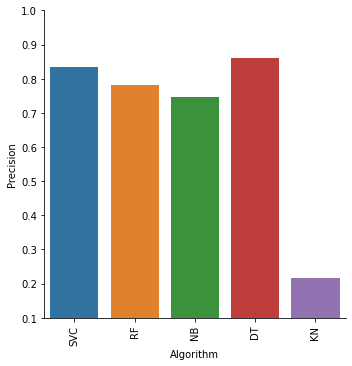

In [111]:
sns.catplot(x='Algorithm', y='Precision',
        data=performance_df, kind='bar')
plt.ylim(0.1, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [126]:
input_mail = ["i've been searching for the right words to thank you for this breather.I promise i wont take your help for granted and will fulfill my promise"]

input = Tfid.transform(input_mail)
prediction = mnb.predict(input)
print(prediction)

[0]
